# Pre-processing
___

The initial data supplied was small and widely imbalanced.  
There were a total of 23 images in the "clean" category and 323 in the "dirty" category.  
This was further reduced by removing images containing people and or cleaning equipment to avoid influencing the model.  
This reduced the dataset further to 12 "clean" images and 141 "dirty" images.

This notebook will explore this initial batch of photos

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image

from sklearn.model_selection import train_test_split, GridSearchCV
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import img_to_array, load_img


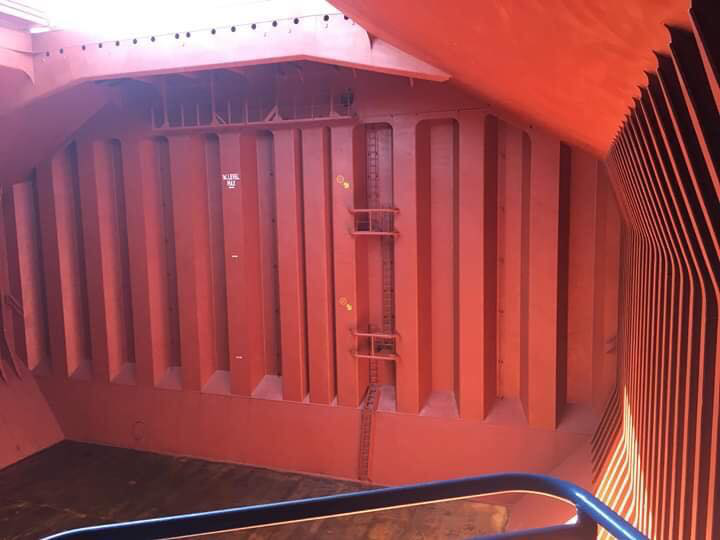

In [3]:
clean = load_img('../data/cargo_holds/clean_website_reviewed/47681173_2008763662504219_1873423245131120640_n.jpg')
clean

In [4]:
clean_array =  img_to_array(clean)
clean_array.shape

(540, 720, 3)

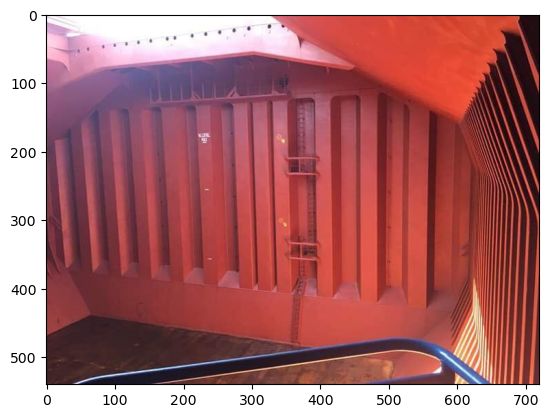

In [5]:
plt.imshow(clean_array/255)

In [6]:
clean_array_reshaped = clean_array.reshape(clean_array.shape[0], -1)
clean_array_reshaped.shape

(540, 2160)

In [7]:
train, test = image_dataset_from_directory(
    '../data/cargo_holds/',
    image_size=(512, 512),
    batch_size=32,
    label_mode='binary',
    seed=42,
    validation_split=0.1,
    subset='both'
)

Found 120 files belonging to 2 classes.
Using 108 files for training.
Using 12 files for validation.


In [9]:
train.class_names, test.class_names

(['clean_website_reviewed', 'dirty_website_reviewed'],
 ['clean_website_reviewed', 'dirty_website_reviewed'])

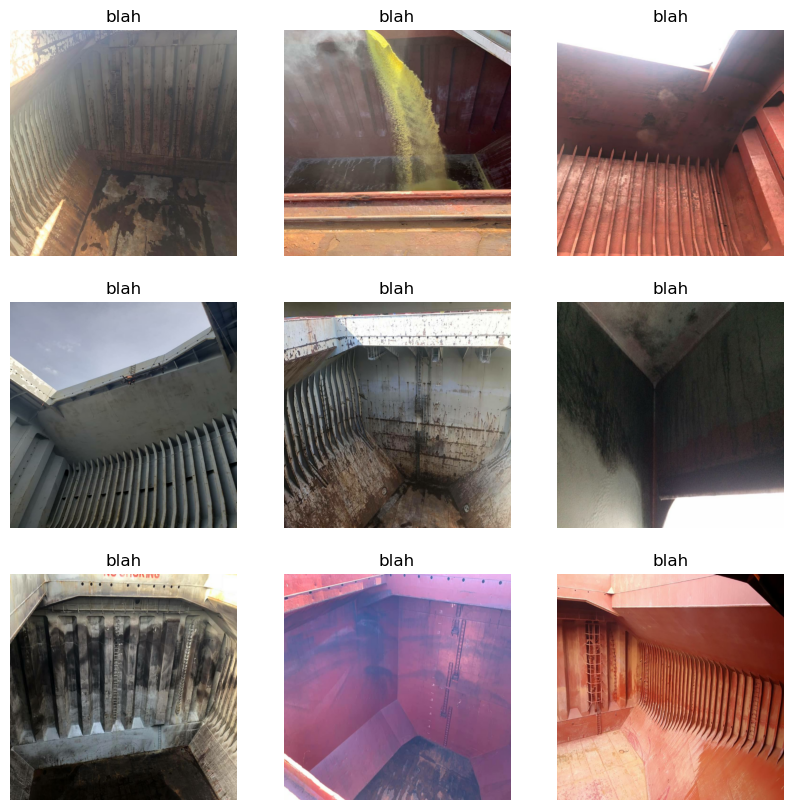

In [21]:
plt.figure(figsize=(10, 10))
for images, labels in test.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title('blah')
    plt.axis("off")

To correct imbalance, can try oversampling minority


In [25]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import make_pipeline

In [26]:
# make a pipeline to reandom over sample minority class
pipe = make_pipeline(RandomOverSampler(random_state=27))# model)
pipe

Pipeline(steps=[('randomoversampler', RandomOverSampler(random_state=27))])

In [27]:
gs = GridSearchCV(pipe, {'randomoversampler__sampling_strategy': [.25, .5, .75, 1]}, n_jobs=-1)

In [28]:
gs.fit(train, test)

TypeError: If no scoring is specified, the estimator passed should have a 'score' method. The estimator Pipeline(steps=[('randomoversampler', RandomOverSampler(random_state=27))]) does not.

In [ ]:
# data augmentation
datagen = ImageDataGenerator(
    brightness_range=(0.5, 1.5),
    rotation_range=45,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    validation_split=0.1,
    fill_mode='constant'
)